In [1]:
# Import the pandas_gbq library to work with Google BigQuery
import pandas_gbq
%matplotlib inline

In [2]:
project_id = 'rakamin-kf-analytics-479117'

In [3]:
# Load data from the BigQuery table into a pandas DataFrame and display the first 5 rows
query = """
SELECT *
FROM `rakamin-kf-analytics-479117.kimia_farma.kf_tabel_analisa`
"""

df = pandas_gbq.read_gbq(query, project_id=project_id)
df.head(5)

Downloading: 100%|██████████|


,transaction_id,date,branch_id,branch_name,kota,provinsi,rating_cabang,customer_name,product_id,product_name,actual_price,discount_percentage,persentase_gross_laba,nett_sales,nett_profit,rating_transaksi
0,TRX3448274,2022-10-27,49520,Kimia Farma - Apotek,Subang,Jawa Barat,4.4,Andre Hawkins,KF172,"Psycholeptics drugs, Hypnotics and sedatives d...",2100,0.15,0.1,1785.0,178.5,3.9
1,TRX2215482,2021-04-29,67373,Kimia Farma - Apotek,Subang,Jawa Barat,4.6,Christopher Cunningham,KF172,"Psycholeptics drugs, Hypnotics and sedatives d...",2100,0.15,0.1,1785.0,178.5,4.6
2,TRX6565400,2020-01-05,90734,Kimia Farma - Apotek,Sukabumi,Jawa Barat,4.6,Belinda Flores,KF172,"Psycholeptics drugs, Hypnotics and sedatives d...",2100,0.15,0.1,1785.0,178.5,3.6
3,TRX9876181,2023-07-08,47344,Kimia Farma - Apotek,Tanjungpinang,Kepulauan Riau,4.9,Phillip George,KF172,"Psycholeptics drugs, Hypnotics and sedatives d...",2100,0.15,0.1,1785.0,178.5,4.7
4,TRX5627898,2023-03-17,15949,Kimia Farma - Apotek,Gorontalo,Gorontalo,4.6,Lisa Miller,KF172,"Psycholeptics drugs, Hypnotics and sedatives d...",2100,0.15,0.1,1785.0,178.5,3.2


# **Data Summary & Descriptive Statistics**

In [4]:
# Display concise summary of the DataFrame including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672458 entries, 0 to 672457
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         672458 non-null  object 
 1   date                   672458 non-null  dbdate 
 2   branch_id              672458 non-null  Int64  
 3   branch_name            672458 non-null  object 
 4   kota                   672458 non-null  object 
 5   provinsi               672458 non-null  object 
 6   rating_cabang          672458 non-null  float64
 7   customer_name          672458 non-null  object 
 8   product_id             672458 non-null  object 
 9   product_name           672458 non-null  object 
 10  actual_price           672458 non-null  Int64  
 11  discount_percentage    672458 non-null  float64
 12  persentase_gross_laba  672458 non-null  float64
 13  nett_sales             672458 non-null  float64
 14  nett_profit            672458 non-nu

In [5]:
# Convert the 'actual_price' column to float data type
df["actual_price"] = df.actual_price.astype(float)

In [6]:
# Check the descriptive statistics for selected numerical columns
numeric_cols = [
    "actual_price",
    "nett_sales",
    "nett_profit",
    "rating_transaksi",
    "rating_cabang"
]

df[numeric_cols].describe()

,actual_price,nett_sales,nett_profit,rating_transaksi,rating_cabang
count,672458.000000,672458.000000,672458.000000,672458.000000,672458.000000
mean,516347.954519,477607.806464,135644.141433,4.000033,4.447984
std,284547.593398,264422.423296,85148.115522,0.579164,0.323350
min,2100.000000,1785.000000,178.500000,3.000000,3.900000
25%,296900.000000,273702.000000,56411.000000,3.500000,4.200000
50%,523100.000000,480150.000000,142444.500000,4.000000,4.500000
75%,757900.000000,703380.000000,211014.000000,4.500000,4.700000
max,997500.000000,997500.000000,299250.000000,5.000000,5.000000




*   From the descriptive statistics of the selected columns, the mean and median values show no significant differences and are generally very close. For instance, the actual_price column has a mean of 516,348 and a median of 523,100, while nett_sales has a mean of 477,608 and a median of 480,150, indicating a roughly symmetric distribution. Similarly, the rating_transaksi column has a mean of 4.000 and a median of 4.000, and the rating_cabang column shows a mean of 4.448 and a median of 4.500. The nett_profit column, with a mean of 135,644 and a median of 142,445, exhibits a slightly left-skewed distribution but remains reasonably centered. **Overall, these results suggest that the data distributions are approximately symmetrical and not heavily skewed. However, the presence of outliers cannot be ruled out, and further analysis such as a boxplot or interquartile range (IQR) assessment can help verify this.**
*   **The standard deviations** for actual_price, nett_sales, and nett_profit **are considered high** because they exceed 50% of their mean values, indicating that **transaction amounts and profitability vary widely across products**.


# **Data Distribution**

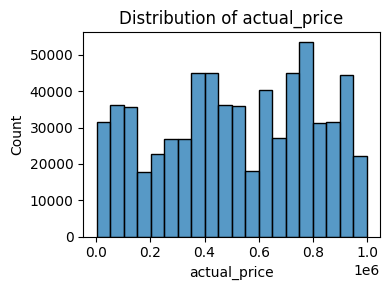

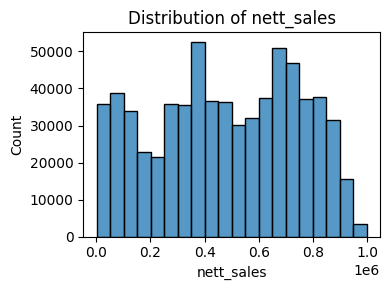

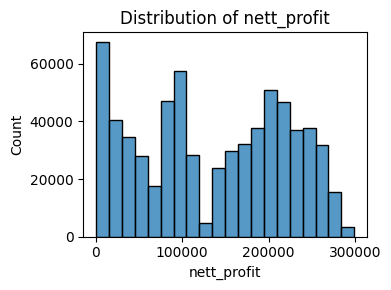

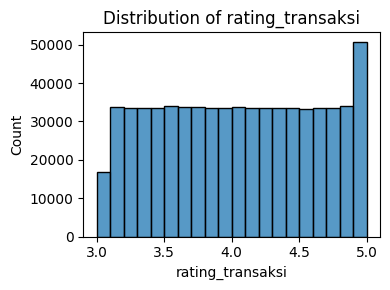

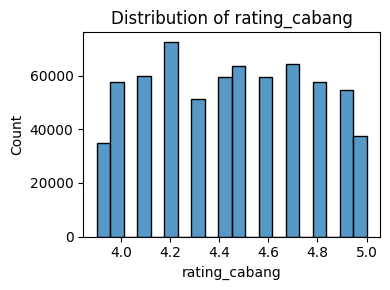

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    "actual_price",
    "nett_sales",
    "nett_profit",
    "rating_transaksi",
    "rating_cabang",
]

for col in columns_to_plot:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()



*   Financial variables such as actual_price, nett_sales, and nett_profit show **multimodal distributions**, indicating the presence of multiple groups or **distinct value segments within the data**.
*   **Rating_transaksi is relatively evenly distributed between 3.0 and 4.9**, with a noticeable spike at 5.0 for perfect scores. **The distribution shows no outliers, reflecting typical patterns in human rating behavior** rather than a perfectly uniform spread.
*   The histogram of **rating_cabang** shows limited variability, with values strongly concentrated in the 4.25–4.75 range. This distribution **tends to be unimodal and appears nearly symmetrical**, indicating a **strong user preference** for consistently high scores. **Moreover, no extreme outliers are observed, as all data points remain tightly clustered within the main distribution**.







# **Checking the Data Outliers**

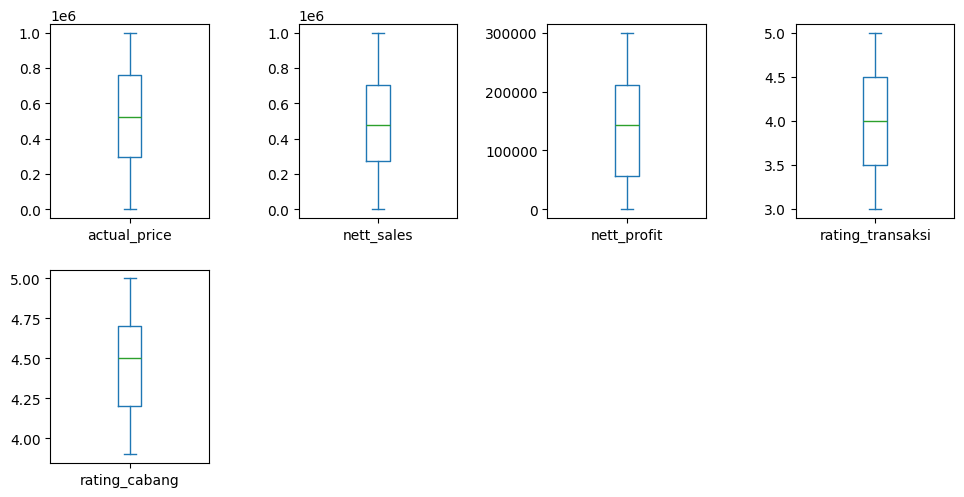

In [12]:
df[columns_to_plot].plot(
    kind="box",
    figsize=(10, 10),
    subplots=True,
    layout=(4, 4),
    sharex=False,
    sharey=False
)

plt.tight_layout(pad=2)

The box plot and histogram analyses confirm that the selected columns exhibit well-behaved distributions, with **no outliers present**. Data points are tightly clustered within their expected ranges, indicating high consistency and limited variability across observations. **Such stability suggests that summary statistics like mean, median, and standard deviation accurately reflect the underlying trends, making the dataset reliable for further analytical applications**.